<a href="https://colab.research.google.com/github/poojaagrwal/Deep-Learning/blob/master/VGG_and_Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dog vs Cat classification using VGG and Lenet architectures

In [33]:
!pip install tensorflow-gpu==2.0.0-beta1
#!pip install tensorflow-gpu==2.0.0-

     |████████████████████████████████| 348.9MB 41kB/s 


In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
#import keras
import cv2                 # working with, mainly resizing, images
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion
from google.colab.patches import cv2_imshow

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D, Activation, MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import keras
#from keras.utils import plot_model


In [3]:
print(tf.__version__)
print(tf.keras.__version__)

1.15.0
2.2.4-tf


In [4]:
from google.colab import  drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')  
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats')  
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  

In [7]:
batch_size = 128
epochs = 5
HEIGHT = 150
WIDTH = 150
learning_rate = 0.0001

try:
  device_name = os.environ['COLAB_TPU_ADDR']
  TPU_ADDRESS = 'grpc://' + device_name
  print(TPU_ADDRESS)
except KeyError:
  print('No TPU device')

grpc://10.92.39.98:8470


###Data Preprocessing

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory=train_dir,shuffle=True,target_size=(HEIGHT, WIDTH),batch_size=batch_size,class_mode='binary')


Found 2000 images belonging to 2 classes.


In [9]:
vaildation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = vaildation_datagen.flow_from_directory(directory=validation_dir,target_size=(HEIGHT, WIDTH),batch_size=batch_size,class_mode='binary')


Found 1000 images belonging to 2 classes.


In [10]:
train_cats_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train/cats'

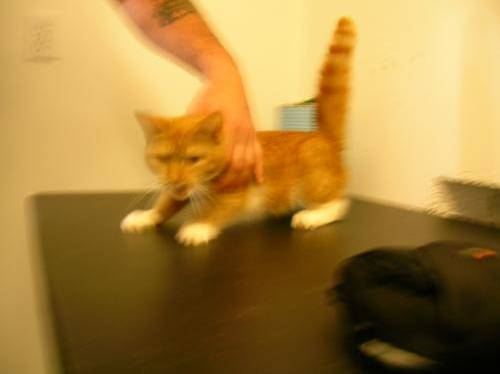

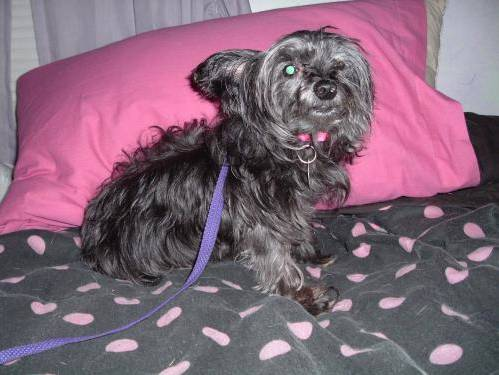

In [11]:
image = cv2.imread(train_cats_dir+"/cat.0.jpg") 
cv2_imshow(image)

image = cv2.imread(train_dogs_dir+"/dog.0.jpg") 
cv2_imshow(image)

In [0]:
opt = tf.keras.optimizers.Adam()

In [0]:
class LeNet:

    def build():
    
        model = Sequential()
        inputShape = (150,150, 3)

        model.add(Conv2D(6, (3,3),  input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(AveragePooling2D())

        model.add(Conv2D(16, (3,3)))
        model.add(Activation("relu"))
        model.add(AveragePooling2D())

        model.add(Flatten())
        model.add(Dense(120))
        model.add(Activation("relu"))

        model.add(Dense(84))
        model.add(Activation("relu"))

        model.add(Dense(1))
        model.add(Activation("sigmoid"))

        return model


In [14]:
lenet_model = LeNet.build()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
print(lenet_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 6)       168       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 6)       0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 74, 74, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        880       
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 36, 36, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [17]:
'''tf.config.experimental_connect_to_host(TPU_ADDRESS)
resolver = tf.distribute.cluster_resolver.TPUClusterResolver() 
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)
devices=tf.config.experimental_list_devices()
print(*devices,sep="\n")
with strategy.scope():'''
lenet_model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

lenet_hist = lenet_model.fit_generator(
      train_generator,
      steps_per_epoch=total_train,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=total_val)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
2000/2000 [==============================] - 3737s 2s/step - loss: 0.0655 - acc: 0.9691 - val_loss: 3.0802 - val_acc: 0.6590
Epoch 2/5
2000/2000 [==============================] - 3726s 2s/step - loss: 9.8220e-06 - acc: 1.0000 - val_loss: 3.6641 - val_acc: 0.6660
Epoch 3/5
2000/2000 [==============================] - 3712s 2s/step - loss: 1.7195e-06 - acc: 1.0000 - val_loss: 4.0805 - val_acc: 0.6650
Epoch 4/5
2000/2000 [==============================] - 3729s 2s/step - loss: 4.4689e-07 - acc: 1.0000 - val_loss: 4.4480 - val_acc: 0.6620
Epoch 5/5
2000/2000 [==============================] - 3721s 2s/step - loss: 1.3178e-07 - acc: 1.0000 - val_loss: 4.7974 - val_acc: 0.6630


In [0]:
lenet_model.save('lenet_model.h5') 

In [19]:
'''tf.config.experimental_connect_to_host(TPU_ADDRESS)
resolver = tf.distribute.cluster_resolver.TPUClusterResolver() 
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)
devices=tf.config.experimental_list_devices()
print(*devices,sep="\n")'''

'tf.config.experimental_connect_to_host(TPU_ADDRESS)\nresolver = tf.distribute.cluster_resolver.TPUClusterResolver() \ntf.tpu.experimental.initialize_tpu_system(resolver)\nstrategy = tf.distribute.experimental.TPUStrategy(resolver)\ndevices=tf.config.experimental_list_devices()\nprint(*devices,sep="\n")'

Moving lenet_model from CPU to TPU

In [19]:
tpu_lenet_model = tf.contrib.tpu.keras_to_tpu_model(lenet_model, strategy=tf.contrib.tpu.TPUDistributionStrategy(
    tf.distribute.cluster_resolver.TPUClusterResolver(TPU_ADDRESS)))


INFO:tensorflow:Querying Tensorflow master (grpc://10.92.179.218:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 12869280226486570888)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 7884320524555112699)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 10653637372796484806)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 11459942047166807028)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 17323911585333004558)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:

AttributeError: ignored

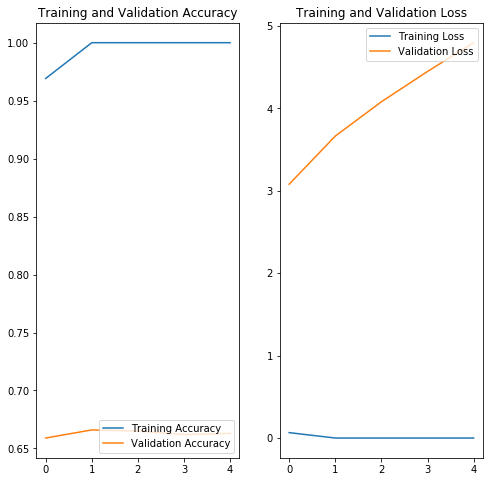

In [19]:

train_acc = lenet_hist.history['acc']
val_acc = lenet_hist.history['val_acc']

train_loss = lenet_hist.history['loss']
val_loss = lenet_hist.history['val_loss']
epochs = 5
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modified Lenet

Data generation for augmentation for modified lenet

In [0]:
def plotImages(images_arr, subplt):
    fig, axes = plt.subplots(1, subplt, figsize=(15,15))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Found 2000 images belonging to 2 classes.


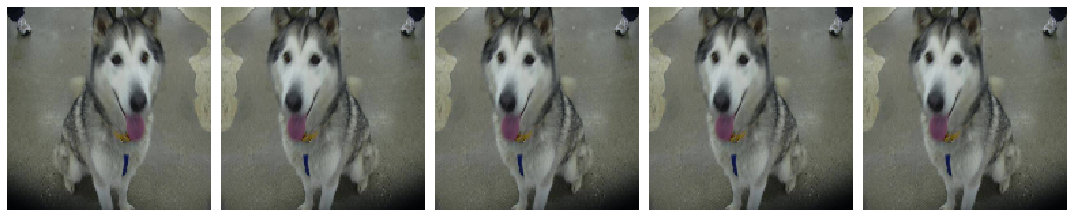

In [17]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
        directory=train_dir,
        shuffle=True,
        target_size=(HEIGHT, WIDTH),
        batch_size=batch_size)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images,5)

Found 2000 images belonging to 2 classes.


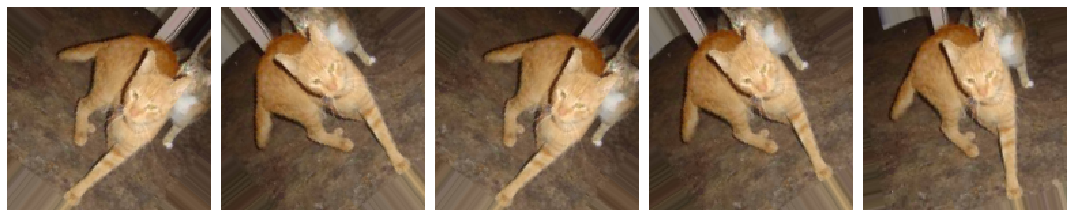

In [18]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(HEIGHT, WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images,5)

Found 2000 images belonging to 2 classes.


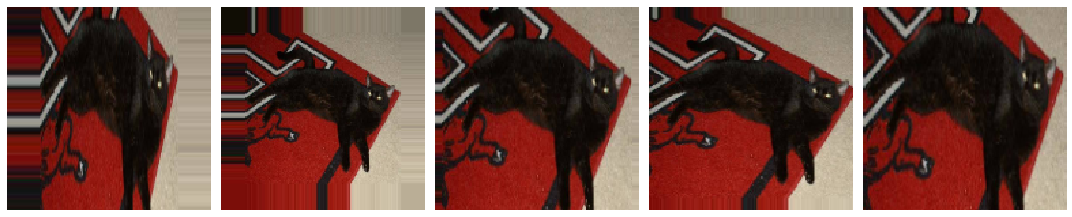

In [19]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(HEIGHT,WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images,5)

Found 2000 images belonging to 2 classes.


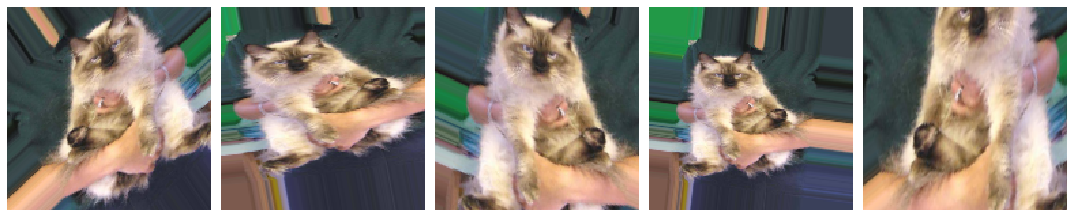

In [20]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(HEIGHT, WIDTH),
                                                     class_mode='binary')
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images,5)

In [22]:
lenet_model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

hist_lenet_modified = lenet_model.fit_generator(
      train_data_gen,
      steps_per_epoch=total_train,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=total_val)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
2000/2000 [==============================] - 4618s 2s/step - loss: 0.5202 - acc: 0.7340 - val_loss: 0.5354 - val_acc: 0.7420
Epoch 2/5
2000/2000 [==============================] - 4582s 2s/step - loss: 0.4030 - acc: 0.8127 - val_loss: 0.5928 - val_acc: 0.7410
Epoch 3/5
2000/2000 [==============================] - 4622s 2s/step - loss: 0.3414 - acc: 0.8481 - val_loss: 0.6895 - val_acc: 0.7370
Epoch 4/5
2000/2000 [==============================] - 4631s 2s/step - loss: 0.3035 - acc: 0.8673 - val_loss: 0.7335 - val_acc: 0.7290
Epoch 5/5
2000/2000 [==============================] - 4630s 2s/step - loss: 0.2769 - acc: 0.8810 - val_loss: 0.7733 - val_acc: 0.7150


In [0]:
lenet_model.save('lenet_model_modified.h5') 

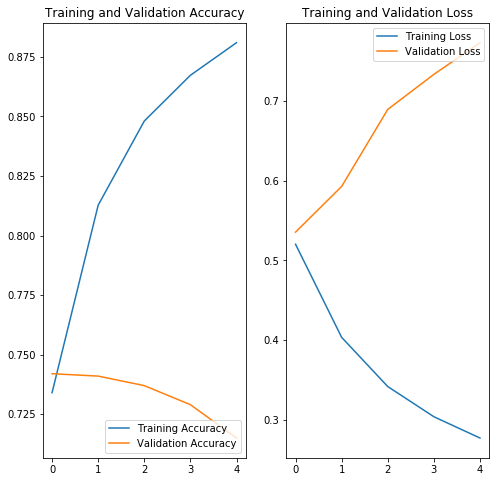

In [24]:
acc_lenetm = hist_lenet_modified.history['acc']
val_acc_lenetm = hist_lenet_modified.history['val_acc']

loss_lenetm = hist_lenet_modified.history['loss']
val_loss_lenetm = hist_lenet_modified.history['val_loss']
epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_lenetm, label='Training Accuracy')
plt.plot(epochs_range, val_acc_lenetm, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_lenetm, label='Training Loss')
plt.plot(epochs_range, val_loss_lenetm, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### VGG16

In [0]:
class VGGNet:
    
    def build():
        model = Sequential()
        inputShape = (150, 150, 3)
        
        model.add(Conv2D(64, (3, 3), padding="same", input_shape=inputShape))
        model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))

        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
        model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))

        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
        model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
        model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))

        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
        model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
        model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))

        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
        model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
        model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))

        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))  

        model.add(Flatten())
        model.add(Dense(4096, activation="relu"))
        model.add(Dense(4096, activation="relu"))
        model.add(Dense(1, activation="sigmoid"))
        
        return model



In [18]:
model2 = VGGNet.build()
model2.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history_vgg = model2.fit_generator(
      train_generator,
      steps_per_epoch=total_train,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=total_val)

Epoch 1/5
  88/2000 [>.............................] - ETA: 53:50:46 - loss: 0.7068 - acc: 0.4975

In [0]:
acc_vgg = history_vgg.history['acc']
val_acc_vgg = history_vgg.history['val_acc']

loss_vgg = history_vgg.history['loss']
val_loss_vgg = history_vgg.history['val_loss']
epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accacc_vgg_lenetm, label='Training Accuracy')
plt.plot(epochs_range, val_acc_vgg, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_vgg, label='Training Loss')
plt.plot(epochs_range, val_loss_vgg, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()